In [1]:
import datajoint as dj

In [2]:
schema = dj.Schema('quiz')

[2023-10-02 00:53:48,908][INFO]: Connecting root@fakeservices.datajoint.io:3306
[2023-10-02 00:53:48,920][INFO]: Connected root@fakeservices.datajoint.io:3306


In [3]:
@schema
class Subject(dj.Manual):
    definition = """
    subject_id : varchar(15)
    ---
    subject_name : varchar(60)
    """

In [4]:
@schema
class User(dj.Manual):
    definition = """
    user_id : int unsigned
    ---
    first_name : varchar(60)
    last_name : varchar(60)
    birthday : date 
    """

In [5]:
@schema
class Question(dj.Manual):
    definition = """
    -> Subject
    question_id : int unsigned
    ---
    question : varchar(2000)
    """

In [6]:
@schema
class Answer(dj.Manual):
    definition = """
    -> Question
    answer_id : tinyint unsigned 
    ---
    answer: varchar(300)
    correct = null : enum('YES')
    unique index(subject_id, question_id, correct)
    """

In [7]:
# Make user take a quiz only once in each calendar year on any subject

In [8]:
@schema
class Quiz(dj.Manual):
    definition = """
    -> User
    -> Subject
    year : year
    ---
    date : date
    """

In [9]:
@schema
class QuizQuestion(dj.Manual):
    definition = """
    -> Quiz
    -> Question
    """

In [10]:
@schema
class SubmittedAnswer(dj.Manual):
    definition = """
    -> QuizQuestion
    -> Answer
    """

In [11]:
@schema
class Result(dj.Manual):
    definition = """
    -> Quiz
    ---
    number_correct : int(3)
    """

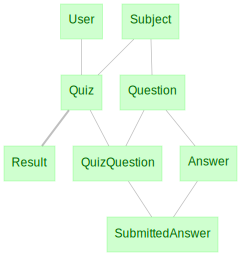

In [12]:
dj.Diagram(schema)

In [14]:
@schema
class Subject2(dj.Lookup):
    definition = """
    subject_id : varchar(6)
    ---
    subject_name : varchar(60)
    """
    
    contents = [
        ("DaSy", "Database Systems" ), 
        ("ML", "Machine Learning" ),
        ("SciViz", "Scientific Visualization")
    ]
    
@schema
class User2(dj.Manual):
    definition = """
    user_id : int unsigned
    ---
    first_name : varchar(60)
    last_name : varchar(60)
    birthday : date 
    """
    
@schema
class Question2(dj.Manual):
    definition = """
    -> Subject2
    question_id : int unsigned
    ---
    question : varchar(2000)
    """
    
@schema
class Answer2(dj.Manual):
    definition = """
    -> Question2
    answer_id : tinyint unsigned 
    ---
    answer: varchar(300)
    correct = null : enum('YES')
    unique index(subject_id, question_id, correct)
    """
    
@schema
class Quiz2(dj.Manual):
    definition = """
    -> User2
    -> Subject2
    year : year
    ---
    date : date
    """
    
    class Question(dj.Part):
        definition = """
        -> master
        -> Question2
        """
        
@schema
class Submission2(dj.Manual):
    definition = """
    -> Quiz2
    """
    
    class Answer(dj.Part):
        definition = """
        -> master
        -> Answer2
        """

@schema
class Result2(dj.Manual):
    definition = """
    -> Submission2
    ---
    number_correct : smallint
    """

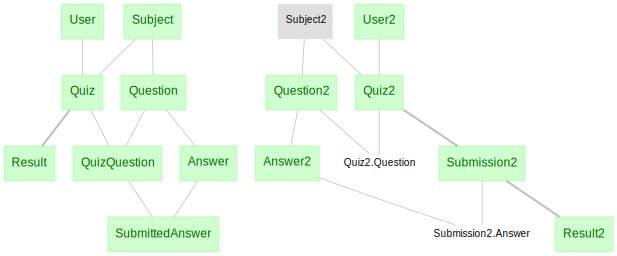

In [15]:
dj.Diagram(schema)

In [17]:
Subject2()

subject_id,subject_name
DaSy,Database Systems
ML,Machine Learning
SciViz,Scientific Visualization
